In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [54]:
true_pi = np.pi
data = {}

def generate_plot(file_name, number_of_nodes, name_of_devnode):
    with open(file_name, 'r') as file:
        lines = file.readlines()

        processor_count = 0
        darts = 0  

        # Process each line in the output file
        for line in lines:
            if 'total processor count:' in line:
                processor_count = int(line.split(':')[1].strip())
                data[processor_count] = []
            elif line.strip().isdigit():  
                darts = int(line.strip())
            elif 'Estimated Pi' in line:
                estimated_pi = float(line.split('=')[1].strip())
                error = abs(estimated_pi - true_pi)
                # Storing darts and error in the dictionary for each processor count
                data[processor_count].append([darts, error])
    for key in data.keys():
        data[key] = np.array(data[key])
    
    plt.loglog()
    plt.grid(True, which="both", ls="-")
    used_keys = []
    for key in data.keys():
        if key not in used_keys:
            plt.plot(data[key][:, 0], data[key][:, 1], marker=".", zorder=3, label=f"{key} processors")
            used_keys.append(key)
    plt.xlabel("Number of darts")
    plt.ylabel("Absolute error")
    plt.title(f"{number_of_nodes} node, {name_of_devnode}")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig(f"{name_of_devnode}-{number_of_nodes}-question7.png", bbox_inches='tight')

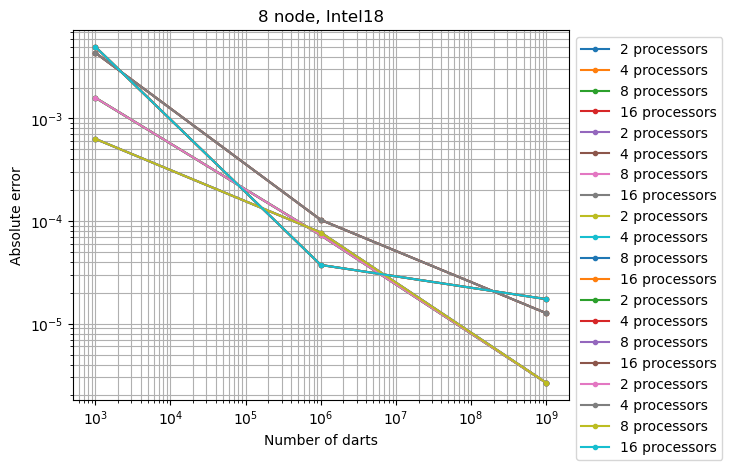

In [50]:
generate_plot("p7_amd20_1node.output", 1, "AMD20")
generate_plot("p7_amd22_1node.output", 1, "AMD22")
generate_plot("p7_intel18_1node.output", 1, "Intel18")
generate_plot("p7_intel18_4cores.output", 4, "Intel18")
generate_plot("p7_intel18_8node.output", 8, "Intel18")